Various Synthetic Minority Oversampling Technique (SMOTE) variations to oversample the underrepresented class of Closed = No and see if that improves the accuracy of the model

In [359]:
#Installing imblearn
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [360]:
import pandas as pd
import seaborn as sns

In [361]:
df = pd.read_csv('/content/drive/MyDrive/CIND 820 Capstone Project/merged_completedata.csv')

df = df[df['Year'] == 2019]
df.drop(['Year'], axis=1, inplace=True)
#NAICSCode back to object as it is nominal not ordinal
df['NAICSCode'] = df['NAICSCode'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16518 entries, 46689 to 63206
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RecordID    16518 non-null  int64  
 1   X           16518 non-null  float64
 2   Y           16518 non-null  float64
 3   FID         16518 non-null  int64  
 4   BusinessID  16518 non-null  int64  
 5   Name        16518 non-null  object 
 6   Address     16518 non-null  object 
 7   StreetNo    16518 non-null  int64  
 8   StreetName  16518 non-null  object 
 9   BldgNo      16518 non-null  object 
 10  UnitNo      16518 non-null  object 
 11  PostalCode  16518 non-null  object 
 12  Location    16518 non-null  object 
 13  Ward        16518 non-null  int64  
 14  NAICSCode   16518 non-null  object 
 15  NAICSCat    16518 non-null  object 
 16  NAICSDescr  16518 non-null  object 
 17  Phone       16518 non-null  object 
 18  Fax         16518 non-null  object 
 19  TollFree    16518 non

In [362]:
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [363]:
df.describe()

,RecordID,X,Y,FID,BusinessID,StreetNo,BldgNo,UnitNo,Ward,Phone,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,Age,isnew,Closed
count,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,1.651800e+04,16518.000000,16518.000000,16518.000000
mean,54948.500000,-79.657689,43.601356,8259.500000,38317.374803,2949.933285,0.050188,0.665093,5.372927,0.990314,0.623078,0.150624,0.608911,0.738709,2.183981,608803.895873,4.828662e+06,3.364451,0.105703,0.164306
std,4768.480209,0.046612,0.056180,4768.480209,32183.768108,2364.551005,0.218339,0.471972,2.452044,0.097945,0.484630,0.357692,0.488009,0.439351,1.450311,3622.954311,6.225972e+03,1.029033,0.307466,0.370564
min,46690.000000,-79.802980,43.485170,1.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,596627.934200,4.815547e+06,1.000000,0.000000,0.000000
25%,50819.250000,-79.697599,43.560065,4130.250000,10300.250000,1050.250000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,606962.728400,4.824380e+06,3.000000,0.000000,0.000000
50%,54948.500000,-79.655443,43.600388,8259.500000,20467.000000,2380.000000,0.000000,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,609549.255500,4.828519e+06,4.000000,0.000000,0.000000
75%,59077.750000,-79.622510,43.643674,12388.750000,57398.250000,5144.500000,0.000000,1.000000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,611124.363600,4.833333e+06,4.000000,0.000000,0.000000
max,63207.000000,-79.550935,43.732864,16518.000000,93823.000000,7895.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,616985.055200,4.843108e+06,4.000000,1.000000,1.000000


1) SMOTE on two continuous features - SMOTE is used to synthesize data where the features are continuous and a classification problem

<Axes: xlabel='EmplRange', ylabel='Age'>

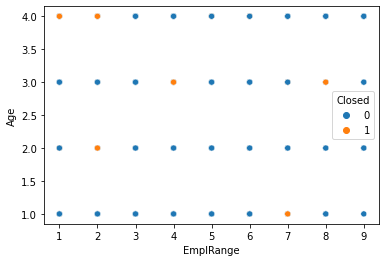

In [364]:
#use two continuous features EmplRange and Age with the target Closed
df_unbalanced = df[['EmplRange', 'Age', 'Closed']]
sns.scatterplot(data = df, x ='EmplRange', y = 'Age', hue = 'Closed')

<Axes: xlabel='Closed', ylabel='count'>

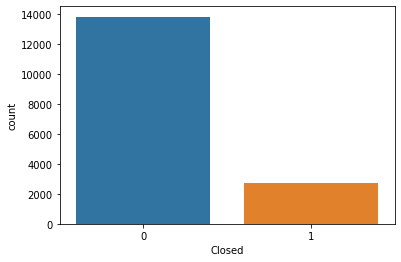

In [365]:
sns.countplot(x=df["Closed"])

Balancing the dataset with SMOTE oversampling

In [366]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[['EmplRange', 'Age']], df['Closed'])
df_oversampler = pd.DataFrame(X, columns = ['EmplRange', 'Age'])
df_oversampler['Closed'] = y

<Axes: xlabel='Closed', ylabel='count'>

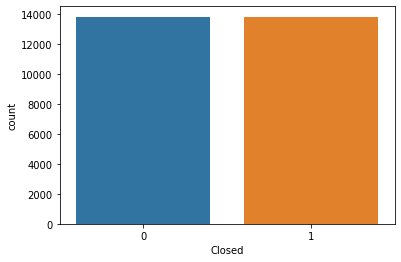

In [336]:
sns.countplot(x=df_oversampler['Closed'])

<Axes: xlabel='EmplRange', ylabel='Age'>

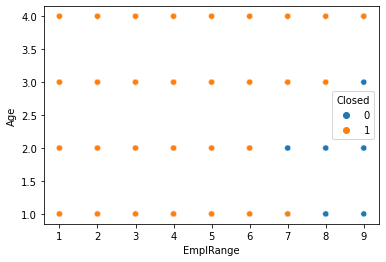

In [367]:
sns.scatterplot(data = df_oversampler, x ='EmplRange', y = 'Age', hue = 'Closed')

In [368]:
df_oversampler.describe()

,EmplRange,Age,Closed
count,27608.000000,27608.000000,27608.000000
mean,2.110910,3.307556,0.500000
std,1.398145,1.061371,0.500009
min,1.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000
50%,2.000000,4.000000,0.500000
75%,3.000000,4.000000,1.000000
max,9.000000,4.000000,1.000000


In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Split the data set into test and train
X_train, X_test, y_train, y_test = train_test_split(df_unbalanced[['EmplRange', 'Age']], df['Closed'], test_size = 0.2, stratify = df['Closed'], random_state = 101)

In [370]:
#Create the oversampled training data
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [371]:
#Training results with imbalanced data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2761
           1       0.00      0.00      0.00       543

    accuracy                           0.84      3304
   macro avg       0.42      0.50      0.46      3304
weighted avg       0.70      0.84      0.76      3304



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [372]:
#Training results with oversampled data
classifier_smote = LogisticRegression()
classifier_smote.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2761
           1       0.18      0.29      0.22       543

    accuracy                           0.66      3304
   macro avg       0.51      0.51      0.50      3304
weighted avg       0.73      0.66      0.69      3304



In [373]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, classifier_smote.predict(X_test))
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[2009  752]
 [ 383  160]]
TP:  160 , FP:  752 , TN:  2009 , FN: 383


2) SMOTENC ((Nominal and Continuous) - with one continuous and one categorical feature

In [374]:
df_unbalanced = df[['EmplRange', 'NAICSCode', 'Closed']]

In [375]:
X_train, X_test, y_train, y_test = train_test_split(df_unbalanced[['EmplRange', 'NAICSCode']],df['Closed'], test_size = 0.2,stratify = df['Closed'], random_state = 101)

In [376]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([1],random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [377]:
#Classifier results with imbalanced data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2761
           1       0.00      0.00      0.00       543

    accuracy                           0.84      3304
   macro avg       0.42      0.50      0.46      3304
weighted avg       0.70      0.84      0.76      3304



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [378]:
#Classifier results with SMOTENC
classifier_smotenc = LogisticRegression()
classifier_smotenc.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier_smotenc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66      2761
           1       0.20      0.59      0.30       543

    accuracy                           0.54      3304
   macro avg       0.53      0.56      0.48      3304
weighted avg       0.76      0.54      0.60      3304



In [379]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, classifier_smotenc.predict(X_test))
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[1470 1291]
 [ 220  323]]
TP:  323 , FP:  1291 , TN:  1470 , FN: 220


 3) Borderline-SMOTE using two continuous features (only makes synthetic data along the decision boundary between the two classes. 

In [380]:
df_unbalanced = df[['EmplRange', 'Age', 'Closed']]

In [381]:
X_train, X_test, y_train, y_test = train_test_split(df_unbalanced[['EmplRange', 'Age']], df['Closed'], test_size = 0.2,  stratify = df['Closed'], random_state = 101)

In [382]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_oversample_borderline, y_oversample_borderline = bsmote.fit_resample(X_train, y_train)

In [383]:
classifier_borderlinesmote = LogisticRegression()
classifier_borderlinesmote.fit(X_oversample_borderline, y_oversample_borderline)
print(classification_report(y_test, classifier_border.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57      2761
           1       0.17      0.60      0.27       543

    accuracy                           0.46      3304
   macro avg       0.51      0.52      0.42      3304
weighted avg       0.73      0.46      0.52      3304



In [384]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, classifier_border.predict(X_test))
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)


Confusion Matrix
[[1195 1566]
 [ 218  325]]
TP:  325 , FP:  1566 , TN:  1195 , FN: 218


4) Borderline-SMOTE SVM (using the data from the Borderline-SMOTE example)

In [385]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)
X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)
classifier_svm = LogisticRegression()
classifier_svm.fit(X_oversample_svm, y_oversample_svm)
print(classification_report(y_test, classifier_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2761
           1       0.18      0.09      0.12       543

    accuracy                           0.78      3304
   macro avg       0.51      0.51      0.50      3304
weighted avg       0.73      0.78      0.75      3304



In [386]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, classifier_svm.predict(X_test))
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[2544  217]
 [ 494   49]]
TP:  49 , FP:  217 , TN:  2544 , FN: 494


5) Adaptive Synthetic Sampling (ADASYN) - using the data from the SMOTE example again.  ADASYN creates synthetic data according to the data density - more where density is low and less where density is high

In [387]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)
X_oversample_adasyn, y_oversample_adasyn = adasyn.fit_resample(X_train, y_train)
classifier_adasyn = LogisticRegression()
classifier_adasyn.fit(X_oversample_adasyn, y_oversample_adasyn)
print(classification_report(y_test, classifier_adasyn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.30      0.44      2761
           1       0.18      0.77      0.29       543

    accuracy                           0.37      3304
   macro avg       0.52      0.53      0.37      3304
weighted avg       0.75      0.37      0.42      3304



In [388]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, classifier_adasyn.predict(X_test))
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 821 1940]
 [ 126  417]]
TP:  417 , FP:  1940 , TN:  821 , FN: 126
